In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ctypes
from ctypes import *
import re

# Cll the C-Code
ll = ctypes.cdll.LoadLibrary
lib_ckf = ll("./filterpy_unit_algorithmckf.so")
lib_detect = ll("./filterpy_unit_algorithmdetect.so")

print("This is U0 & I0 test.")

# √New__曾经有问题__Index632+1__L7 区内消弧线圈 0欧 A相__BAY01_0057_20181001_213807_986__U0_列数据
#u0 = np.array([3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, -20, -590, -848, -834, -995, -1032, -1020, -1013, -1042, -1061, -1113, -1067, -1002, -1099, -1038, -1030, -1045, -1061, -978, -970, -961, -947, -927, -889, -862, -824, -777, -755, -735, -687, -635, -598, -548, -502, -465, -428, -373, -308, -257, -214, -170, -114, -61, -3, 51, 103, 148, 198, 249, 301, 353, 405, 449, 490, 533, 583, 632, 672, 707, 744, 781, 817, 853, 885, 914, 938, 959, 980, 1005, 1025, 1041, 1054, 1062, 1072, 1081, 1087, 1089, 1088, 1082, 1076, 1070, 1062, 1049, 1031, 1012, 993, 972, 947, 921, 892, 862, 828, 791, 755, 720, 682, 636, 589, 547, 504, 458, 405, 356, 309, 259, 205, 151, 102, 53, -2, -59, -110, -158, -207, -260, -313, -359, -405, -453, -502, -547, -587, -629, -672, -713, -749, -782, -817, -850, -882, -919, -960, -954, -974, -1003, -1022, -1024, -1051, -1054, -1062, -1071, -1064, -1066, -1070, -1066, -1050, -1052, -1037, -1020, -1005, -992, -969, -946, -924, -898, -871, -838, -806, -777, -744, -702, -662, -625, -588, -543, -498, -453, -410, -364, -314, -265, -218, -171, -122, -68, -16, 31, 77, 127, 179, 228, 273, 319, 367, 414, 458, 499, 543, 588, 628, 665, 702, 741, 777, 810, 840, 871, 901, 926, 947, 968, 990, 1010, 1027, 1040, 1054, 1065, 1074, 1079, 1083, 1085, 1085, 1082, 1077, 1071, 1061, 1049, 1036, 1022, 1003, 981, 960, 936, 912, 883, 852, 821, 790, 755, 717, 677, 641, 602, 557, 511, 469, 427, 379, 329, 281, 236, 189, 136, 84, 36, -10, -61, -114, -162, -207, -254, -304, -353, -397, -439, -483, -529, -572, -610, -647, -687, -726, -760, -791, -823, -856, -884, -917, -952, -964, -969, -1001, -1024, -1024, -1052, -1054, -1065, -1074, -1062, -1073, -1070, -1062, -1052, -1048, -1026, -1010, -996, -976, -950, -923, -897, -869, -833, -798, -764, -728, -686, -642, -597, -555, -512, -464, -411, -359, -312, -263, -208, -152, -99, -48, 4, 60, 114, 165, 215, 267, 321, 371, 417, 464, 512, 560, 605, 644, 685, 727, 767, 802, 835, 868, 900, 927, 950, 971, 996, 1016, 1032, 1047, 1059, 1070, 1077, 1082, 1084, 1085, 1081, 1075, 1069, 1058, 1045, 1028, 1011, 992, 967, 942, 915, 887, 856, 820, 784, 748, 710, 667, 622, 579, 537, 489, 436, 387, 341, 291, 236, 180, 130, 80, 25, -32, -84, -134, -184, -239, -292, -340, -386, -435, -487, -533, -575, -617, -661, -703, -741, -775, -810, -845, -877, -910, -941, -962, -970, -1002, -1025, -1025, -1054, -1056, -1066, -1076, -1064, -1075, -1070, -1062, -1054, -1050, -1027, -1012, -998, -977, -951, -924, -898, -870, -834, -798, -765, -729, -686, -643, -599, -555, -512, -465, -411, -360, -312, -263, -209, -153, -101, -48, 3, 60, 114, 165, 214, 266, 321, 370, 416, 463, 512, 560, 603, 644, 685, 728, 766, 801, 834, 869, 900, 926, 950, 971, 996, 1015, 1031, 1046, 1058, 1070, 1076, 1080, 1083, 1084, 1080, 1074, 1068, 1057, 1043, 1028, 1010, 991, 966, 941, 914, 886, 855, 819, 782, 747, 709, 665, 620, 578, 535, 487, 435, 386, 339, 290, 234, 179, 128, 79, 23, -34, -87, -135, -186, -241, -294, -343, -389, -437, -489, -534, -576, -618, -663, -704, -741, -777, -811, -847, -878, -906, -932, -956, -980, -1000, -1016, -1031, -1045, -1054, -1062, -1067, -1069, -1069, -1064, -1060, -1053, -1041, -1027, -1012, -995, -974, -949, -923, -897, -868, -835, -798, -764, -728, -688, -644, -598, -557, -513, -465, -413, -363, -315, -266, -211, -156, -103, -53, 0, 56, 110, 161, 210, 263, 316, 366, 412, 458, 507, 554, 598, 639, 680, 723, 761, 796, 829, 863, 895, 924, 948, 973, 995, 1016, 1032, 1047, 1059, 1069, 1076, 1081, 1084, 1083, 1080, 1075, 1068, 1057, 1042, 1027, 1010, 990, 966, 940, 913, 885, 853, 818, 781, 746, 708, 664, 619, 577, 534, 485, 433, 384, 337, 287, 232, 176, 127, 76, 21, -35, -88, -137, -187, -243, -296, -343, -389, -439, -490, -535, -578, -619, -663, -706, -743, -778, -813, -848, -880, -907, -933, -958, -981, -1001, -1017, -1032, -1046, -1055, -1062, -1068, -1070, -1069, -1066, -1061, -1053, -1041, -1027, -1012, -995, -975, -950, -924, -898, -869, -836, -799, -763, -728, -688, -644, -599, -557, -514, -465, -413, -364, -315, -265, -211, -155, -104, -52, 0, 56, 110, 160, 210, 263, 315, 365, 412, 458, 507, 555, 598, 639, 680, 722, 761, 795, 829, 863, 894, 923, 948, 972, 995, 1015, 1031, 1046, 1059, 1068, 1076, 1082, 1083, 1083, 1079, 1074, 1066, 1056, 1040, 1026, 1009, 990, 965, 939, 911, 885, 852, 816, 779, 745, 706, 663, 617, 575, 533, 484, 432, 382, 336, 285, 230, 176, 126, 75, 20, -36, -90, -139, -190, -244, -297, -345, -391, -441, -490, -537, -579, -621, -666, -707, -744, -779, -815, -850, -881, -908, -933, -959, -983, -1002, -1017, -1033, -1046, -1056, -1063, -1068, -1070, -1070, -1065, -1061, -1054, -1043, -1027, -1012, -996, -975, -949, -923, -898, -870, -836, -799, -764, -728, -688, -643, -600, -557, -513, -465, -412, -363, -316, -266, -211, -156, -104, -53, 0, 56, 110, 161, 210, 262, 316, 366, 412, 458, 508, 555, 598, 638, 680, 722, 761, 795, 828, 863, 895, 923, 948, 971, 995, 1014, 1031, 1046, 1058, 1069, 1076, 1080, 1083, 1083, 1078, 1074, 1066, 1055, 1041, 1026, 1008, 989, 964, 938, 910, 883, 851, 816, 779, 744, 705, 661, 617, 574, 531, 482, 430, 382, 335, 284, 229, 174, 124, 74, 18, -38, -91, -140, -191, -246, -298, -346, -393, -442, -493, -539, -580, -622, -667, -709, -746, -780, -815, -851, -882, -909, -934, -960, -983, -1003, -1018, -1033, -1047, -1056, -1063, -1069, -1071, -1070, -1067, -1062, -1054, -1043, -1027, -1013, -996, -975, -949, -924, -898, -870, -836, -799, -764, -728, -688, -644, -600, -557, -514, -464, -413, -363, -315, -266, -211, -156, -103, -53, 0, 56, 110, 161, 210, 262, 317, 365, 411, 458, 508, 555, 598, 638, 680, 722, 760, 795, 828, 863, 894, 922, 947, 971, 994, 1014, 1031, 1045, 1058, 1068, 1074, 1080, 1082, 1081, 1078, 1073, 1065, 1054, 1040, 1024, 1007, 988, 963, 937, 910, 882, 850, 814, 778, 742, 704, 659, 615, 573, 529, 481, 429, 380, 333, 283, 227, 173, 122, 72, 16, -39, -92, -142, -193, -248, -300, -348, -394, -443, -494, -539, -581, -623, -667, -710, -747, -781, -816])
#z0 = np.array([5, -8, -15, -2, 1, -12, -17, 8, 21, 12, -6, -15, -18, -9, 2, -9, 3, -1, -6, 5, -6, -15, -7, 3, 5, 7, 0, -12, -16, 1, -4, -14, -14, 2, 6, -2, -13, -15, 2, 4, 1, -5, 21, 17, 19, 29, 15, 26, 10, 6, 6, -8, 4, -3, -13, -15, 2, 5, 6, 7, 6, -6, 2, 5, 7, 8, 7, 8, 7, 7, -6, -14, -5, 4, 5, -6, 10, 21, -2, 7, 8, 7, 8, 8, 8, 8, 4, -8, 4, -4, 0, 6, 7, 7, 8, 8, 6, -8, 4, -1, -4, 4, 6, -3, 4, 23, 0, 6, -2, -2, 5, 6, -3, 0, 5, 6, 7, 7, 3, -8, 5, 6, 8, 8, 7, 8, 8, 11, 26, 1, 6, 0, -4, 6, 6, 8, 8, 7, 7, 20, 22, 13, 10, 23, 21, 13, 8, -8, 4, 6, 10, 26, 17, 11, 9, 6, -9, -16, -18, -8, 2, 4, 7, 7, 5, -10, -16, -19, -6, 2, -10, -17, -2, 4, 6, -7, -15, -4, 2, -10, -17, -20, -19, -17, 15, 6, -9, -9, 3, -8, -15, -6, 4, 5, 6, 7, 8, 7, 8, -2, 0, 4, -9, 3, -2, -3, 4, -8, 2, 0, -13, -17, 0, 4, 10, 26, 17, 0, 2, 5, 6, 8, 17, 20, 0, 7, -4, -15, -18, -19, 0, 4, 0, -7, 4, 6, 6, 7, 8, 8, -4, 0, 6, 23, 32, 27, 15, 11, 8, -3, -14, -10, 3, -8, -15, -19, -16, 1, 5, 7, 7, 7, 8, 6, 1, -6, 4, -6, -15, -9, 2, 6, 7, 7, 8, 8, 7, -1, -1, 6, 7, -3, 1, 7, 25, 4, 6, 2, -11, -17, 0, -3, -13, -17, 1, 5, 1, -12, -17, 0, 4, 2, -9, 4, -4, -14, -18, -20, 0, 4, 6, 6, -8, 15, 22, 13, 9, 9, 8, 7, 8, 8, -4, -14, -10, 2, -8, -15, -6, 1, -10, -17, -19, -10, 2, 5, -4, 0, 6, 24, 19, 20, 28, 16, 10, -2, 0, 7, 25, 19, 2, 0, 5, 7, -5, -15, -10, 2, 6, -4, -13, -12, 1, -8, 0, 5, 8, 7, -3, 0, 6, 7, -6, 2, 1, -11, -16, -19, -4, 4, 6, 6, 8, 8, 7, -8, -16, -2, 3, 7, 7, -3, 0, 5, 6, -5, -15, -8, 3, 5, 6, 1, -6, 4, 6, 8, 8, 8, 8, -4, 1, 6, 8, 6, 6, 2, -10, -17, 0, -2, -13, -17, 0, 5, 6, 6, -8, 4, 6, 4, -10, -17, 0, 4, 4, -9, 4, 5, 3, -8, 4, -5, 0, 4, 7, 7, -2, -13, -15, 2, -7, 0, 2, -9, 3, -4, -1, 4, -9, -17, -19, -10, 2, -9, -17, -18, -15, 1, -7, -17, -18, -19, -20, -1, -3, -13, -18, -19, -19, -20, -20, -21, -2, -10, -33, -26, -23, -21, -21, -21, -20, -1, 4, 6, 7, -7, 13, 23, 13, 10, -4, 2, 5, 7, 8, 19, 23, 12, -6, 5, 6, 2, -8, 4, 6, 7, 7, 8, -6, 11, 23, 15, 10, 8, 8, 5, -8, 4, 6, 6, 6, -10, -15, -2, 0, -10, 4, 6, 6, 8, 8, 7, 8, 3, -8, 4, 6, 0, -5, 4, 6, -3, -13, -13, 2, 4, 6, 4, -9, 4, 6, 2, -6, 4, 6, 6, 4, -8, 4, 6, 6, 5, -10, 3, -3, -2, 4, 6, 8, 0, -13, -17, 1, -4, -2, 4, 6, -5, 1, 5, 6, -8, 3, 0, -13, -17, 0, -4, -3, 4, 6, 6, 7, 8, 7, 21, 23, 13, 9, -7, -15, -18, -12, 2, 6, 6, 6, 6, -8, -16, -2, 0, -10, 4, 6, 7, 8, 7, -5, -15, 67, 527, 4887, 2306, -290, 1991, -939, -177, 548, 769, 1740, -702, -700, 287, 867, -141, 1021, 592, -606, -525, 514, 752, 559, 247, 70, -94, 14, 403, 1006, 352, -70, -52, 201, 290, 555, 507, 227, -129, 3, 384, 528, 443, 275, 80, 36, 181, 484, 501, 258, 108, 82, 186, 356, 429, 358, 177, 61, 180, 312, 386, 356, 232, 130, 138, 242, 373, 368, 256, 142, 106, 201, 290, 305, 252, 145, 145, 199, 262, 305, 276, 188, 134, 136, 221, 274, 247, 190, 138, 148, 214, 254, 250, 195, 155, 151, 179, 222, 239, 199, 163, 146, 154, 190, 222, 212, 179, 166, 177, 195, 208, 211, 181, 166, 160, 166, 196, 193, 177, 164, 162, 177, 214, 214, 193, 171, 162, 172, 189, 206, 213, 201, 627, 592, -358, 420, 189, 83, 239, 229, 254, 212, 121, 58, 374, 220, 184, 266, 303, 114, 191, 279, 273, 223, 202, 202, 212, 214, 216, 270, 265, 199, 173, 224, 235, 230, 241, 247, 220, 209, 220, 254, 238, 225, 227, 238, 226, 235, 244, 242, 226, 206, 206, 219, 237, 245, 231, 212, 201, 210, 232, 241, 245, 243, 229, 206, 205, 211, 212, 198, 203, 220, 229, 205, 208, 212, 208, 194, 189, 200, 201, 192, 187, 186, 186, 177, 167, 194, 177, 173, 180, 183, 184, 184, 184, 182, 164, 158, 156, 158, 174, 180, 168, 151, 138, 145, 150, 151, 151, 154, 170, 179, 172, 160, 156, 153, 152, 145, 134, 144, 149, 151, 151, 152, 152, 165, 177, 177, 164, 158, 153, 152, 151, 152, 166, 177, 181, 183, 182, 543, 397, -474, 316, 150, 86, 211, 232, 256, 159, 82, 115, 328, 146, 193, 288, 140, 156, 238, 251, 195, 186, 186, 184, 189, 207, 263, 208, 173, 185, 220, 203, 202, 202, 189, 167, 201, 238, 247, 211, 209, 212, 212, 217, 249, 221, 208, 211, 211, 212, 225, 229, 217, 197, 203, 209, 211, 210, 195, 188, 184, 186, 200, 193, 197, 193, 168, 157, 182, 182, 171, 194, 190, 184, 175, 163, 172, 163, 155, 157, 171, 159, 154, 151, 151, 150, 149, 149, 149, 149, 149, 149, 149, 149, 148, 149, 149, 143, 130, 141, 145, 147, 149, 149, 149, 149, 142, 131, 140, 130, 123, 121, 120, 119, 119, 119, 121, 137, 144, 137, 131, 141, 146, 147, 149, 148, 148, 134, 379, 201, -581, 283, 128, 64, 197, 207, 242, 140, 78, 128, 331, 133, 173, 270, 98, 106, 203, 237, 183, 163, 154, 162, 173, 181, 231, 175, 138, 150, 185, 185, 204, 210, 175, 176, 206, 219, 206, 173, 174, 177, 186, 203, 226, 206, 179, 169, 193, 203, 195, 185, 180, 162, 169, 185, 195, 185, 163, 169, 175, 181, 197, 189, 194, 197, 185, 164, 169, 157, 141, 162, 156, 174, 182, 162, 152, 149, 138, 130, 140, 128, 134, 134, 124, 119, 117, 128, 134, 125, 136, 143, 138, 128, 138, 128, 121, 124, 136, 125, 121, 126, 135, 123, 119, 129, 132, 125, 137, 128, 131, 131, 104, 126, 126, 121, 120, 135, 127, 108, 100, 110, 130, 127, 121, 121, 136, 127, 131, 140, 144, 145, 146, 156, 164, 154, 149, 147, 147, 147, 147, 146, 146, 147, 145, 146, 145, 146, 148, 165, 157, 162, 167, 156, 167, 173, 176, 177, 177, 193, 192, 184, 178, 160, 151, 158, 170, 174, 177, 177, 184, 195, 167, 169, 175, 177, 177, 160, 164, 164, 156, 169, 173, 165, 153, 148, 147, 145, 154, 164, 154, 148, 158, 164, 153, 148, 146, 145, 145, 145, 145, 145, 138, 124, 118, 130, 130, 121, 117, 116, 114, 115, 114, 114, 114, 125, 126, 101, 108, 111, 114, 114, 114, 98, 100, 103, 91, 86, 97, 99, 93, 106, 110, 100, 88, 85, 82, 97, 108, 111, 112, 96, 88, 92, 103, 91, 101, 109, 112, 114, 114, 113, 114, 114, 114, 98, 110, 125, 119, 116, 114, 114, 114, 114, 130, 139, 141, 143, 144, 144, 144, 144, 144, 143, 145, 144, 144, 144, 145, 155, 168, 173, 174, 162, 160, 166, 155, 164, 159, 150, 147, 162, 156, 158, 169, 173, 175, 162, 157, 167, 154, 176, 185, 175, 156, 149, 158, 162, 151, 146, 145, 155, 162, 151, 147, 145, 144, 140, 125, 133, 128, 125, 134, 123, 117, 114, 113, 114, 129, 125, 118, 117, 131, 109, 102, 109, 112, 112, 112, 105, 93, 103, 94, 85, 88, 101, 91, 98, 99, 88, 83, 82, 81, 81, 82, 99, 107, 101, 93, 104, 93, 85, 82, 81, 81, 95, 97, 86, 82, 82, 80, 81, 83, 100, 107, 100, 88, 83, 82, 94, 90, 73, 95, 89, 84, 82, 82, 99, 106, 118, 129, 119, 131, 114, 100, 110, 128, 123, 125, 136, 140, 142, 155, 159, 149, 145, 128, 119, 120, 132, 122, 129, 136, 139, 141, 142, 131, 120, 117, 130, 137, 141, 140, 141, 142, 142, 142, 143, 161, 154, 147, 144, 143, 142, 141, 142, 141, 142, 142, 141, 141, 143, 159, 154, 146, 141, 123, 117, 124, 128, 119, 114, 97, 105, 123, 117, 113, 122, 134, 137, 123, 129, 118, 99, 105, 76, 71, 75, 80, 97, 91, 82, 81, 80, 80, 79, 71, 61, 71, 60, 64, 73, 75, 78, 78, 78, 78, 79, 80, 78, 86, 97, 71, 71, 75, 78, 78, 78, 67, 62, 73, 76, 78, 78, 78, 78, 78, 78, 71, 62, 90, 86, 81, 80, 80, 79, 93, 95, 84, 81, 80, 91, 103, 107, 108, 110, 111, 110, 109, 110, 98, 93, 104, 108, 110, 119, 132, 137, 138, 139, 132, 120, 114, 126, 135, 134, 119, 114, 125, 127, 116, 112, 111, 110, 110, 110, 110, 123, 133, 134, 120, 113, 112, 110, 111, 128, 120, 114, 111, 110, 110, 122, 124, 116, 112, 111, 110, 110, 109, 91, 84, 80, 82, 98, 88, 81, 86, 100, 106, 93, 84, 80, 79, 95, 91, 90, 99, 86, 68, 65, 69, 56, 67, 60, 60, 68, 57, 65, 73, 74, 75, 60, 52, 49, 52, 67, 73, 75, 77, 74, 59, 52, 58, 66, 55, 50, 48, 48, 47, 47, 47, 57, 69, 73, 60, 52, 49, 47])
#---New__Index582__L3 区外 L5 1000欧 A相__BAY01_0043_20181001_041918_151
##u0 = np.array([2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, -8, -16, -23, -32, -45, -55, -64, -74, -84, -92, -100, -108, -117, -125, -131, -137, -143, -150, -155, -159, -161, -164, -167, -168, -169, -168, -168, -166, -163, -161, -158, -152, -146, -140, -133, -125, -115, -106, -98, -87, -74, -62, -50, -37, -22, -7, 6, 19, 34, 51, 68, 83, 99, 115, 133, 149, 163, 178, 196, 212, 227, 242, 256, 271, 285, 298, 311, 322, 335, 344, 354, 363, 372, 379, 385, 391, 395, 399, 402, 403, 404, 404, 402, 398, 395, 390, 383, 376, 368, 359, 348, 336, 323, 310, 296, 278, 260, 244, 225, 204, 183, 161, 141, 119, 93, 68, 45, 21, -5, -32, -57, -81, -104, -134, -161, -185, -210, -237, -263, -287, -309, -333, -358, -381, -401, -421, -442, -462, -479, -494, -508, -527, -542, -555, -565, -576, -585, -592, -598, -602, -605, -606, -606, -606, -603, -600, -596, -590, -584, -576, -566, -556, -546, -534, -519, -504, -489, -474, -457, -436, -417, -398, -377, -353, -329, -306, -284, -258, -230, -203, -177, -152, -122, -91, -62, -34, -6, 26, 56, 85, 112, 142, 174, 204, 231, 259, 289, 319, 346, 372, 398, 426, 453, 477, 501, 525, 549, 571, 591, 607, 630, 650, 666, 680, 698, 713, 727, 738, 749, 758, 766, 773, 778, 782, 785, 786, 786, 784, 781, 777, 771, 764, 756, 746, 733, 722, 708, 694, 676, 658, 640, 620, 598, 574, 551, 527, 501, 472, 444, 418, 389, 355, 323, 292, 262, 227, 191, 156, 124, 89, 51, 14, -21, -54, -91, -129, -165, -197, -232, -268, -305, -337, -368, -398, -436, -468, -498, -528, -558, -588, -615, -640, -666, -692, -717, -737, -757, -778, -794, -810, -825, -843, -858, -872, -882, -891, -898, -903, -905, -906, -906, -901, -896, -889, -879, -867, -853, -836, -820, -801, -778, -753, -727, -703, -674, -640, -607, -575, -542, -504, -463, -424, -386, -346, -300, -261, -217, -171, -124, -75, -27, 18, 61, 109, 158, 202, 245, 289, 336, 381, 422, 462, 503, 545, 585, 622, 657, 694, 729, 760, 790, 819, 848, 874, 895, 916, 938, 957, 972, 985, 996, 1007, 1014, 1018, 1021, 1021, 1018, 1014, 1008, 1000, 988, 973, 958, 942, 923, 899, 872, 848, 820, 788, 755, 722, 688, 650, 608, 567, 529, 487, 439, 391, 346, 303, 252, 199, 149, 102, 53, 0, -53, -102, -149, -200, -253, -301, -346, -392, -442, -490, -533, -574, -617, -662, -702, -737, -772, -810, -844, -875, -903, -930, -957, -979, -997, -1016, -1035, -1052, -1064, -1073, -1082, -1087, -1089, -1089, -1086, -1081, -1072, -1061, -1049, -1034, -1015, -993, -970, -948, -926, -894, -860, -825, -789, -748, -704, -662, -621, -576, -527, -477, -429, -381, -328, -272, -218, -166, -114, -55, 2, 57, 109, 162, 219, 274, 326, 374, 426, 479, 529, 575, 621, 668, 714, 756, 795, 834, 874, 910, 942, 972, 1001, 1031, 1053, 1070, 1090, 1111, 1128, 1139, 1149, 1157, 1161, 1162, 1161, 1157, 1151, 1140, 1129, 1115, 1098, 1076, 1053, 1029, 1003, 971, 938, 903, 870, 831, 787, 743, 702, 657, 606, 554, 505, 456, 401, 343, 288, 236, 181, 118, 58, 3, -51, -110, -171, -227, -280, -334, -391, -441, -492, -544, -596, -649, -698, -741, -783, -828, -871, -908, -940, -970, -1008, -1040, -1067, -1091, -1114, -1135, -1152, -1166, -1178, -1188, -1194, -1198, -1198, -1196, -1191, -1182, -1171, -1159, -1141, -1121, -1099, -1076, -1049, -1017, -984, -950, -916, -875, -830, -787, -745, -698, -644, -591, -541, -490, -434, -374, -315, -260, -203, -140, -77, -16, 40, 98, 161, 222, 279, 333, 390, 450, 505, 555, 606, 660, 711, 759, 803, 847, 892, 933, 970, 1006, 1040, 1071, 1100, 1127, 1152, 1175, 1193, 1209, 1222, 1232, 1239, 1244, 1245, 1245, 1240, 1232, 1222, 1210, 1193, 1174, 1152, 1128, 1102, 1071, 1037, 1003, 968, 928, 884, 839, 796, 749, 697, 642, 591, 540, 483, 420, 362, 307, 249, 183, 118, 60, 1, -61, -127, -188, -244, -302, -365, -424, -479, -531, -587, -643, -696, -743, -789, -839, -886, -927, -964, -1003, -1041, -1075, -1105, -1131, -1159, -1183, -1203, -1218, -1233, -1245, -1254, -1259, -1261, -1261, -1257, -1251, -1242, -1231, -1216, -1196, -1174, -1151, -1127, -1092, -1059, -1025, -989, -948, -902, -859, -816, -766, -712, -657, -605, -552, -494, -431, -372, -313, -254, -188, -122, -60, 0, 62, 129, 193, 252, 309, 370, 433, 491, 545, 599, 656, 710, 761, 807, 856, 904, 948, 987, 1025, 1063, 1099, 1131, 1158, 1184, 1209, 1231, 1249, 1264, 1276, 1285, 1289, 1294, 1294, 1291, 1283, 1276, 1264, 1249, 1228, 1208, 1185, 1158, 1128, 1093, 1059, 1024, 984, 938, 893, 849, 801, 748, 691, 639, 586, 527, 463, 404, 347, 285, 218, 151, 91, 30, -36, -105, -160, -211, -270, -346, -412, -469, -525, -583, -643, -698, -747, -795, -847, -896, -940, -980, -1020, -1061, -1096, -1128, -1156, -1184, -1207, -1229, -1250, -1265, -1280, -1289, -1296, -1299, -1301, -1298, -1290, -1282, -1271, -1256, -1237, -1216, -1193, -1166, -1134, -1100, -1067, -1031, -989, -942, -899, -854, -805, -749, -694, -641, -587, -527, -463, -402, -343, -282, -214, -147, -83, -20, 43, 112, 177, 238, 297, 360, 424, 484, 540, 596, 655, 710, 763, 812, 860, 910, 956, 998, 1037, 1077, 1114, 1147, 1176, 1204, 1230, 1253, 1272, 1288, 1300, 1311, 1318, 1321, 1323, 1320, 1314, 1306, 1295, 1280, 1261, 1239, 1217, 1190, 1159, 1124, 1090, 1054, 1014, 968, 922, 878, 829, 775, 718, 664, 611, 551, 487, 425, 366, 306, 236, 168, 106, 44, -23, -93, -157, -216, -279, -345, -409, -467, -523, -583, -643, -699, -750, -800, -854, -903, -947, -989, -1030, -1072, -1108, -1141, -1170, -1200, -1227, -1250, -1267, -1285, -1300, -1310, -1317, -1321, -1322, -1320, -1314, -1306, -1295, -1280, -1260, -1239, -1217, -1190, -1158, -1123, -1091, -1054, -1012, -966, -921, -877, -826, -770, -714, -660, -606, -545, -481, -419, -359, -297, -229, -160, -95, -31, 32, 102, 169, 231, 291, 355, 420, 481, 537, 595, 654, 711, 765, 814, 863, 915, 962, 1004, 1044, 1085, 1123, 1157, 1186, 1215, 1243, 1266, 1285, 1301, 1315, 1326, 1334, 1337, 1338, 1337, 1331, 1323, 1313, 1297, 1279, 1258, 1235, 1208, 1177, 1143, 1108, 1072, 1031, 985, 939, 894, 846, 790, 733, 680, 626, 564, 500, 438, 380, 317, 248, 178, 116, 53, -15, -86, -150, -210, -274, -342, -405, -458, -509, -578, -642, -698, -751, -802, -855, -908, -952, -994, -1036, -1078, -1110, -1143, -1177, -1209, -1236, -1259, -1278, -1295, -1309, -1321, -1329, -1334, -1335, -1333, -1327, -1320, -1309, -1292, -1273, -1253, -1231, -1204, -1172, -1138, -1106, -1068, -1025, -978, -933, -889, -839, -782])
##z0 = np.array([-13, -19, -21, -12, 0, 3, 4, 6, 6, 6, -7, 0, 0, -11, 2, -6, -16, -13, 0, 4, -4, -2, 2, -10, 1, -3, -15, -19, -21, -4, -3, -10, 2, 4, -2, -6, 2, 4, -5, -2, 3, 5, -7, 0, 0, -13, -18, -21, -8, 2, 21, 17, 0, -13, -15, 0, 3, -2, -6, 2, -10, -17, -8, 1, 4, -6, 0, 0, -13, -17, 7, 20, 11, 7, -6, 0, 3, 4, -9, 2, 10, 22, -2, 5, 4, 6, 5, -9, 1, 4, 4, 6, 6, 6, 0, -8, 3, 4, 6, 6, 6, -8, 1, -1, -13, -19, -21, -22, -22, -22, -23, -4, -4, -15, -20, -21, -4, 2, 4, -10, 1, 4, 6, 4, 6, 5, 6, 5, -10, 2, 4, 5, 6, -9, 1, 4, 4, -11, 1, 4, 2, -10, 2, 4, 6, 2, -10, 2, 4, 5, 5, -9, -18, -5, 2, 4, 5, 4, 5, 5, 5, 6, -2, -4, 3, 4, -5, -2, 1, -11, 2, 3, 2, -10, 2, -7, -2, 1, -13, 1, 4, 0, -10, 2, 4, 4, 3, -10, 1, -4, -4, 2, 4, 5, 6, 2, -12, -19, -3, 2, 3, -11, 0, 4, 2, -11, 2, -6, -2, 3, 5, 5, -4, -15, -16, 1, 15, 21, 12, 8, 6, 6, 5, 6, 6, -6, -16, -10, 0, 4, 4, 6, 4, -10, -17, -21, -22, -22, -23, -22, -8, 0, -13, -19, -21, -10, 0, 3, 6, -2, -14, -19, -21, -3, 2, 3, -11, -18, -4, 2, 4, -10, 0, -1, -9, 2, 5, -3, -5, 2, -10, 1, -2, -7, 2, 4, -13, -22, -4, 2, 4, 4, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, -8, -17, -6, 0, -12, 1, 4, 6, 5, 6, 6, 6, 5, 6, 6, -3, -15, -18, 0, 3, -2, -14, -19, -2, 3, 0, -13, -19, -1, -5, -6, 2, -10, 0, 3, 5, 5, 6, -3, -14, -17, 0, 3, 4, 4, -10, 2, 4, 8, 24, 16, 10, 8, 4, -10, -17, -21, -21, -17, 15, 2, -12, -18, -21, -21, -4, 2, 4, 6, -7, 0, 4, 4, 5, -5, -1, 4, 4, 5, 5, 2, -10, 3, -7, -1, 3, 4, 6, 5, 5, 4, -10, 1, -3, -15, -19, -1, 3, -1, -14, -20, 0, 2, 5, 5, -9, -17, -6, 2, 4, -8, 0, 4, 4, -10, -17, -6, 0, -13, 2, -6, -4, 2, -12, 1, 4, 8, 23, 16, 10, 2, -8, 2, -8, -17, -10, 2, 4, 5, 5, 6, 23, 17, 1, -13, -16, 0, 3, -2, -6, 2, 4, -4, -4, 4, 4, 5, 6, 2, -10, 2, -6, -16, -20, -21, -23, -6, 2, 4, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 18, 15, 0, 6, 6, -3, -2, 3, -10, -19, -4, 0, -14, -19, -2, 2, 2, -11, 1, 4, 1, -11, 2, 4, 0, -8, 2, 4, -4, -4, 2, -10, -18, -6, 0, -12, 1, 4, 5, 4, -10, 1, -3, -15, -18, 0, 3, 0, -14, -19, -2, 3, 5, 4, -9, 0, 4, 4, -10, 2, 4, 5, 6, -10, 0, 3, 4, 6, 6, -4, -15, -17, 0, 2, 5, 6, 6, 6, -5, -16, -15, 0, 3, 5, 2, -10, 2, -6, -1, 2, -11, 2, 4, 1, -13, -19, -20, -22, -15, 0, 3, 14, 14, -23, -4, -10, -18, -20, -21, -22, -22, -22, -23, -40, -15, 4, 20, 12, -6, -16, -20, -21, -22, -22, -23, -11, 0, -12, -18, -6, 0, -13, -19, -3, 2, 4, -10, 1, -3, -4, 20, 15, 9, 11, 27, 32, 34, 35, 34, 35, 36, 35, 35, 36, 35, 36, 35, 36, 36, 36, 35, 36, 37, 54, 47, 41, 37, 36, 36, 36, 36, 34, 36, 35, 26, 23, 49, 42, 25, 22, 29, 33, 19, 11, 8, 6, 6, -7, 0, 0, -13, -19, -21, -22, -16, -1, -10, -27, -40, -30, -25, -36, -48, -52, -54, -55, -54, -55, -55, -54, -55, -54, -58, -73, -65, -59, -56, -55, -54, -69, -79, -80, -66, -58, -67, -65, -42, -48, -53, -54, -51, -34, -44, -51, -45, -34, -45, -35, -28, -25, -22, -22, -23, -6, -2, -14, -19, -2, -3, -9, 2, -8, 0, 4, 5, 6, 17, 28, 33, 34, 35, 36, 35, 36, 35, 36, 36, 39, 56, 62, 56, 47, 59, 65, 79, 83, 74, 69, 69, 67, 67, 68, 84, 79, 80, 91, 95, 96, 86, 75, 70, 68, 68, 76, 85, 74, 70, 68, 74, 87, 75, 71, 69, 62, 47, 39, 49, 60, 62, 47, 39, 36, 35, 35, 35, 22, 19, 29, 32, 33, 34, 29, 15, 8, -6, -17, -21, -22, -23, -23, -30, -45, -52, -54, -55, -56, -56, -56, -56, -62, -76, -82, -70, -71, -81, -84, -84, -86, -86, -86, -84, -86, -85, -92, -106, -96, -104, -103, -93, -88, -86, -98, -103, -95, -108, -97, -90, -87, -86, -86, -84, -86, -84, -85, -101, -99, -97, -107, -79, -78, -82, -81, -66, -59, -56, -49, -33, -26, -38, -39, -28, -24, -23, -22, -7, 0, 4, 19, 20, 10, 7, 6, 6, 13, 30, 51, 45, 40, 38, 36, 36, 50, 60, 65, 67, 82, 91, 95, 97, 97, 84, 82, 91, 95, 81, 84, 93, 94, 97, 97, 97, 101, 117, 107, 89, 83, 93, 114, 108, 91, 82, 89, 78, 72, 77, 86, 75, 70, 79, 79, 53, 42, 39, 36, 34, 35, 35, 24, 12, 8, 6, -8, 0, -2, -14, -19, -21, -23, -22, -23, -39, -49, -56, -73, -65, -72, -73, -65, -78, -82, -97, -104, -92, -88, -101, -110, -115, -117, -118, -118, -123, -137, -126, -121, -119, -119, -119, -118, -118, -118, -118, -118, -132, -131, -123, -119, -118, -118, -117, -117, -117, -101, -91, -82, -65, -58, -69, -70, -60, -56, -39, -28, -24, -23, -21, -2, -6, -4, 3, 4, 5, 13, 26, 33, 49, 51, 42, 39, 54, 49, 41, 41, 57, 78, 80, 78, 90, 95, 95, 107, 119, 126, 128, 128, 130, 130, 130, 130, 130, 130, 128, 130, 130, 129, 129, 130, 128, 130, 129, 130, 129, 115, 96, 81, 90, 94, 85, 74, 70, 68, 39, 36, 55, 62, 49, 29, 20, 28, 15, 23, 20, 6, -11, -19, -21, -22, -23, -23, -39, -49, -58, -74, -65, -72, -73, -65, -78, -83, -95, -109, -114, -117, -117, -118, -117, -119, -134, -130, -123, -121, -136, -143, -145, -147, -147, -132, -123, -121, -118, -118, -118, -127, -134, -125, -120, -132, -133, -124, -120, -102, -92, -88, -87, -104, -98, -90, -83, -66, -59, -56, -49, -33, -26, -24, -23, -22, -19, 14, 15, 17, 28, 33, 34, 35, 41, 56, 63, 66, 67, 67, 68, 68, 78, 91, 94, 95, 112, 123, 130, 147, 139, 121, 114, 123, 127, 142, 153, 157, 158, 143, 134, 138, 151, 156, 144, 144, 149, 136, 132, 131, 121, 107, 99, 98, 97, 97, 97, 97, 83, 73, 70, 67, 67, 55, 43, 36, 19, 10, 6, 1, -13, -19, -21, -22, -23, -23, -39, -38, -34, -47, -52, -67, -78, -83, -84, -85, -86, -92, -108, -114, -130, -132, -128, -138, -128, -133, -142, -147, -147, -147, -148, -149, -148, -147, -148, -148, -147, -147, -134, -134, -137, -126, -121, -131, -134, -124, -120, -119, -118, -111, -95, -72, -61, -66, -78, -81, -67, -60, -57, -54, -35, -28, -25, -11, 0, 3, 5, 6, 6, 6, 21, 39, 56, 62, 67, 67, 67, 68, 68, 68, 78, 90, 95, 97, 97, 106, 121, 126, 128, 128, 128, 128, 110, 131, 149, 154, 157, 159, 148, 136, 132, 131, 144, 133, 117, 123, 128, 128, 121, 109, 121, 125, 117, 104, 100, 98, 97, 88, 73, 52, 57, 62, 60, 44, 39, 23, 11, 3, -13, -19, -21, -8, -2, -14, -19, -23, -27, -45, -52, -54, -63, -77, -83, -100, -100, -97, -108, -96, -104, -113, -119, -135, -143, -147, -147, -147, -148, -148, -148, -148, -147, -148, -160, -166, -155, -150, -148, -148, -147, -147, -131, -135, -143, -143, -128, -121, -119, -113, -97, -108, -100, -90, -87, -86, -69, -71, -73, -60, -39, -29, -25, -12, 0, 4, 5, 5, 6, 6, 6, 15, 29, 33, 34, 48, 60, 67, 84, 92, 96, 103, 117, 125, 114, 112, 123, 127, 128, 117, 117, 143, 153, 143, 144, 150, 138, 149, 155, 158, 156, 141, 134, 121, 115, 141, 136, 131, 130, 127, 109, 117, 113, 102, 98, 98, 97, 97, 97, 97, 65, 47, 39, 36, 35, 21, 20, 25, 15, 8, -5, -17, -21, -23, -23, -23, -23, -25, -58, -62, -66, -78, -83, -84, -85, -91, -108, -114, -117, -125, -140, -144, -147, -147, -149, -147, -147, -147, -148, -148, -148, -148, -148, -148, -147, -148, -148, -147, -148, -149, -165, -149, -130, -125, -137, -143, -145, -142, -126, -103, -93, -87, -85, -85, -69, -60, -56, -54, -36, -43, -41, -29, -22, -2, 3, 10, 24, 13, 9, 17, 32, 54, 62, 77, 82, 76, 87, 93, 96, 102, 118, 107, 101, 114, 140, 134, 131, 131, 130, 130, 130, 143, 152, 154, 140, 133, 143, 153, 154, 140, 132, 141, 147, 138, 149, 130, 124, 144, 135, 116, 105, 99, 98, 97, 97, 89, 75, 70, 68, 68, 61, 46, 39, 36, 28, 9, -10, -18, -21, -22, -23, -23, -38, -58, -65, -41, -47, -53, -62, -79, -101, -112, -105, -104, -128, -123, -121, -119, -121, -137, -144, -146, -147, -147, -131, -151, -159, -153, -149, -149, -148, -147, -149, -166, -145, -138, -143, -146, -147, -147, -141, -127, -121, -119, -117, -117, -117, -117, -104, -100, -108, -94, -73, -62, -51, -33, -26, -24, -23, -22, -20, 0, -8, -2, 3, 5, 19, 30, 38, 56, 62, 66, 67, 67, 68, 82, 92, 100, 117, 106, 115, 125, 131, 147])
#---2017-07-19 第二项检测\L1 区内不接地 500欧 B相
#z0 = np.array([34, 33, 34, 33, 34, 33, 34, 33, 34, 34, 34, 34, 34, 33, 34, 34, 34, 34, 33, 34, 33, 33, 34, 33, 33, 34, 33, 34, 33, 34, 33, 33, 33, 34, 33, 34, 34, 33, 34, 34, 34, 34, 33, 34, 34, 33, 34, 34, 34, 33, 34, 33, 35, 33, 33, 34, 34, 34, 33, 34, 33, 34, 34, 34, 35, 33, 34, 34, 34, 34, 33, 34, 34, 34, 32, 33, 34, 33, 34, 34, 33, 35, 33, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 34, 34, 33, 33, 33, 33, 33, 34, 33, 33, 33, 34, 34, 34, 33, 33, 33, 34, 33, 34, 34, 34, 33, 33, 34, 34, 33, 34, 33, 34, 33, 34, 34, 34, 34, 35, 34, 34, 33, 33, 34, 33, 34, 33, 34, 33, 34, 33, 33, 34, 33, 34, 33, 34, 34, 34, 34, 33, 34, 35, 33, 33, 34, 34, 34, 33, 33, 33, 33, 33, 34, 34, 33, 33, 33, 33, 34, 34, 33, 33, 33, 33, 34, 34, 34, 33, 34, 34, 34, 33, 33, 33, 34, 33, 33, 34, 33, 34, 34, 34, 33, 33, 33, 34, 34, 33, 33, 33, 34, 33, 34, 32, 33, 33, 34, 33, 34, 33, 33, 34, 34, 34, 33, 34, 34, 33, 33, 33, 34, 34, 34, 33, 34, 34, 33, 33, 33, 33, 34, 34, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 34, 34, 34, 34, 34, 33, 33, 33, 33, 34, 34, 33, 34, 33, 34, 33, 33, 33, 34, 33, 33, 33, 34, 34, 34, 33, 33, 34, 33, 34, 34, 34, 34, 33, 34, 33, 34, 33, 33, 34, 33, 34, 33, 34, 34, 34, 33, 34, 34, 34, 34, 33, 33, 34, 34, 34, 33, 34, 33, 34, 33, 34, 34, 34, 34, 33, 33, 33, 33, 34, 34, 34, 34, 33, 34, 33, 34, 34, 34, 34, 35, 34, 34, 34, 34, 34, 34, 33, 34, 34, 33, 33, 33, 33, 34, 34, 33, 34, 34, 34, 35, 33, 34, 33, 34, 34, 33, 33, 34, 33, 34, 34, 33, 33, 34, 35, 34, 34, 34, 34, 34, 34, 34, 33, 35, 33, 33, 34, 34, 34, 34, 33, 33, 34, 33, 34, 33, 33, 34, 34, 34, 35, 34, 33, 34, 34, 33, 34, 34, 34, 34, 34, 33, 34, 33, 33, 33, 33, 33, 34, 34, 33, 34, 34, 33, 34, 34, 34, 33, 33, 34, 33, 33, 34, 33, 34, 34, 34, 34, 34, 33, 34, 34, 34, 33, 34, 33, 34, 33, 34, 33, 34, 33, 34, 34, 34, 34, 34, 34, 34, 34, 33, 34, 34, 33, 34, 33, 33, 33, 34, 33, 34, 33, 34, 34, 33, 34, 34, 33, 33, 34, 34, 34, 34, 34, 33, 33, 33, 34, 33, 33, 33, 33, 34, 33, 33, 33, 34, 35, 33, 34, 33, 34, 33, 34, 34, 34, 34, 34, 33, 33, 34, 30, 30, 31, 32, 31, 31, 31, 31, 32, 32, 32, 33, 33, 34, 34, 34, 35, 35, 34, 35, 34, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 37, 37, 37, 37, 37, 38, 36, 36, 36, 36, 36, 36, 35, 35, 35, 36, 35, 34, 34, 34, 34, 34, 33, 33, 32, 32, 33, 32, 32, 31, 31, 31, 31, 31, 30, 31, 30, 31, 29, 29, 29, 30, 29, 29, 30, 30, 29, 29, 29, 29, 29, 30, 30, 30, 30, 29, 30, 30, 30, 30, 31, 31, 32, 31, 32, 32, 32, 33, 33, 33, 34, 33, 33, 34, 34, 34, 35, 35, 36, 35, 35, 36, 36, 36, 36, 36, 37, 36, 37, 36, 37, 38, 37, 38, 38, 38, 37, 37, 37, 38, 37, 37, 37, 38, 38, 36, 37, 37, 36, 36, 36, 36, 36, 36, 35, 35, 35, 36, 34, 34, 35, 33, 34, 34, 33, 33, 33, 32, 32, 32, 31, 31, 30, 30, 31, 31, 31, 31, 30, 30, 30, 29, 30, 29, 29, 30, 30, 29, 30, 29, 30, 29, 30, 29, 30, 30, 30, 31, 32, 31, 31, 32, 31, 32, 32, 32, 33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 37, 37, 35, 37, 37, 37, 37, 37, 38, 37, 37, 38, 38, 38, 37, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 35, 35, 34, 34, 35, 34, 34, 34, 33, 33, 33, 33, 33, 32, 32, 32, 32, 31, 31, 30, 30, 30, 31, 29, 30, 30, 30, 29, 30, 30, 30, 30, 30, 30, 30, 29, 29, 30, 30, 31, 30, 31, 31, 30, 31, 31, 31, 32, 31, 32, 32, 32, 32, 33, 34, 33, 33, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 37, 38, 38, 38, 37, 37, 37, 38, 37, 37, 37, 37, 37, 37, 36, 36, 36, 35, 36, 35, 35, 33, 35, 34, 33, 34, 33, 33, 33, 33, 33, 32, 31, 31, 30, 31, 31, 31, 30, 30, 30, 30, 31, 30, 30, 30, 30, 30, 29, 29, 30, 30, 31, 29, 31, 30, 30, 30, 30, 31, 30, 30, 31, 30, 31, 31, 31, 32, 31, 32, 32, 33, 33, 33, 35, 34, 34, 35, 34, 34, 36, 36, 35, 36, 35, 35, 37, 36, 36, 36, 37, 37, 37, 38, 38, 37, 38, 38, 39, 37, 37, 38, 38, 37, 37, 37, 37, 38, 38, 36, 36, 37, 36, 36, 36, 36, 35, 35, 35, 35, 35, 34, 35, 35, 34, 34, 33, 33, 33, 33, 32, 32, 32, 31, 31, 31, 30, 31, 31, 30, 31, 30, 29, 30, 30, 30, 30, 29, 30, 30, 29, 30, 29, 29, 30, 29, 30, 30, 30, 31, 30, 31, 31, 31, 31, 31, 32, 33, 32, 33, 33, 32, 33, 33, 34, 33, 33, 35, 35, 34, 35, 35, 35, 36, 35, 37, 36, 36, 37, 37, 37, 37, 37, 38, 37, 37, 37, 38, 38, 37, 38, 37, 37, 37, 38, 38, 38, 37, 37, 38, 37, 37, 37, 37, 36, 36, 36, 36, 35, 35, 35, 35, 34, 34, 34, 34, 33, 33, 33, 32, 33, 32, 31, 32, 31, 31, 31, 30, 31, 30, 30, 30, 30, 30, 29, 29, 29, 31, 29, 29, 30, 30, 29, 30, 30, 29, 29, 30, 30, 30, 30, 29, 31, 31, 31, 31, 32, 32, 32, 31, 32, 32, 33, 33, 33, 34, 35, 34, 34, 35, 36, 35, 36, 36, 36, 36, 36, 37, 36, 37, 37, 36, 37, 37, 38, 37, 38, 38, 37, 38, 37, 38, 38, 38, 37, 38, 37, 38, 37, 37, 36, 37, 37, 36, 36, 35, 35, 35, 35, 34, 35, 35, 35, 33, 34, 35, 33, 33, 33, 33, 33, 31, 31, 32, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 30, 29, 29, 30, 29, 30, 29, 30, 29, 30, 30, 30, 30, 30, 29, 30, 30, 31, 31, 31, 31, 32, 32, 32, 33, 33, 32, 33, 33, 34, 34, 34, 35, 34, 35, 36, 35, 35, 34, 36, 36, 36, 37, 37, 37, 37, 37, 38, 37, 38, 38, 37, 37, 37, 38, 38, 38, 38, 37, 37, 37, 37, 38, 37, 37, 36, 37, 36, 36, 36, 36, 36, 37, 36, 34, 35, 34, 35, 33, 34, 33, 33, 33, 33, 33, 32, 32, 32, 32, 31, 31, 31, 30, 31, 31, 29, 30, 30, 31, 30, 30, 30, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 30, 30, 31, 30, 31, 31, 31, 31, 31, 31, 32, 32, 33, 33, 34, 33, 33, 34, 33, 34, 34, 35, 35, 34, 35, 36, 37, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38, 38, 37, 38, 38, 38, 39, 37, 38, 38, 37, 38, 38, 37, 38, 37, 37, 38, 37, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 34, 33, 33, 33, 34, 32, 33, 32, 32, 32, 31, 32, 31, 31, 31, 31, 31, 30, 29, 30, 30, 30, 29, 29, 29, 30, 30, 30, 30, 29, 30, 30, 30, 30, 30, 30, 31, 30, 31, 31, 31, 31, 31, 32, 31, 31, 32, 33, 33, 33, 33, 34, 34, 34, 34, 35, 34, 35, 35, 36, 36, 35, 37, 36, 36, 37, 37, 37, 37, 38, 38, 37, 37, 37, 38, 37, 37, 38, 38, 38, 38, 37, 38, 37, 38, 37, 37, 38, 37, 37, 37, 36, 36, 36, 36, 36, 36, 35, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 32, 31, 32, 31, 31, 31, 30, 31, 30, 29, 30, 29, 29, 30, 29, 29, 30, 29, 29, 30, 30, 30, 30, 29, 30, 30, 30, 30, 29, 31, 31, 31, 30, 31, 31, 31, 31, 32, 32, 32, 33, 32, 33, 34, 34, 35, 34, 35, 34, 36, 35, 36, 36, 36, 36, 36, 36, 37, 37, 38, 37, 37, 37, 38, 37, 38, 39, 37, 37, 37, 39, 38, 38, 38, 38, 36, 37, 37, 36, 36, 37, 37, 37, 36, 36, 36, 35, 35, 35, 34, 34, 34, 34, 33, 33, 32, 33, 33, 32, 32, 32, 31, 32, 31, 31, 31, 30, 30, 31, 30, 30, 30, 31, 30, 30, 30, 30, 29, 30, 30, 30, 30, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 32, 31, 32, 32, 32, 32, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 36, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 38, 38, 37, 37, 38, 38, 37, 37, 38, 38, 37, 37, 38, 37, 38, 37, 38, 37, 38, 37, 38, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 34, 34, 34, 35, 33, 33, 33, 32, 32, 32, 32, 31, 31, 32, 31, 31])

# 计算前 2 个周波的方差
#print(np.mean(z0[0:128]))
#print(np.mean(z0[0:256]))
#wave_std = np.std(z0[0:128], ddof=1) # 计算全局标准差，默认情况下，numpy 计算的是总体标准偏差，ddof = 0
#print("wave_std = %f" % wave_std)

# 计算前 3 个点的绝对值的平均用于赋值 P
#wave_mea = sum(abs(z01[0:3]))/3
#print("wave_mea_first3 = %f" % wave_mea)

# 取全部周波上的最大5个点绝对值,并剔除前面2个点，留下次大的后3个点，以防数据干扰。
#print("wave_max = %f" % max(z01))

# Open file
# 返回一个文件对象
# √ 故障回放__装置录波_20181123\二阶导数\测试记录_@20181114_New
#file = open("./bay01_0093_20181002_032654_102+all.prn")
# √ 小电流_波形\故障回放__装置录波_20181123\二阶导数\测试记录_@20181116_New
#file = open("./new__index572__l3_in_500_b__bay01_0115_20181004_003120_502+all.prn")
# √ New__Index631+1__L7 区内消弧线圈 0欧 B相__BAY01_0062_20181001_221957_054
file = open("./new__index631+1__l7_in_0_b__bay01_0062_20181001_221957_054+all.prn")
# √ 小电流_波形\故障回放__装置录波_20181123\二阶导数\测试记录_@20181113/New__Index582__L3 区外 L5 1000欧 A相__BAY01_0043_20181001_041918_151__全部列数据.prn
#file = open("./new__index582_l3_outer_l5_1000_a__bay01_0043_20181001_041918_151+all.prn")
# √小电流_波形\故障回放__装置录波_20181123\二阶导数\测试记录_@20181113/New__曾经有问题__Index577__L3 区外 L5 1000欧 B相__BAY01_0054_20181001_210554_074__全部列数据
#file = open("./new__index577_l3_outer_l5__1000__b__bay01_0054_20181001_210554_074+all.prn")

line = file.readline()

u0, z0 = [],[]

for line in file:
    # 正则表达式
    c_array = re.split(r" +",line)
    # Col_1.append(c_array[1])
    u0 = np.append(u0, int(c_array[8])) #直接向 u0 里添加 c_array[1]
    z0 = np.append(z0, int(c_array[4])) #直接向 z0 里添加 c_array[1]
print(z0)

This is U0 & I0 test.
[6. 4. 4. ... 7. 8. 8.]


In [6]:
# 2018-12-26 要注意 c_short, c_float 等的类型必须和 C 语言形参类型一致。
INPUT = c_float * len(z0)
data = INPUT()
for i in range(len(z0)):
    data[i] = z0[i]

INPUT = c_float * len(z0)
gfLocalSampI0 = INPUT()
for i in range(len(z0)):
    gfLocalSampI0[i] = 0.0
    
lib_ckf.unit_ckf_test_case()

# 2018-12-26 byref() 传递指针，因为 C 语言形参是指针类型。
lib_ckf.unit_ckf_process(byref(data), len(z0), byref(gfLocalSampI0));

#plt.figure(figsize=(32, 6))
#plt.plot(data)
#plt.plot(gfLocalSamp)
#plt.grid(True)

#for i in range(len(z01)):
#    print(gfLocalSamp[i])


In [7]:
# Deal U0 Data
lib_detect.unit_unit_detect_test_case()

# 2018-12-26 要注意 c_short, c_float 等的类型必须和 C 语言形参类型一致。
INPUT = c_float * len(u0)
gfLocalSampU0 = INPUT()
for i in range(len(u0)):
    gfLocalSampU0[i] = u0[i]
    
#lib.unit_ckf_test_case()

# 2018-12-26 byref() 传递指针，因为 C 语言形参是指针类型。
index = lib_detect.unit_detect_algorithm_run(byref(gfLocalSampU0), 1664);

#plt.figure(figsize=(32, 6))
#plt.plot(u0)
#plt.plot(gfLocalSamp)
# 显示突变的U0坐标点
#plt.scatter(index, u0[index])
#plt.grid(True)

print("Find the Index is %d \r\n" % (index))

Find the Index is 632 



-116894.2822265625
-293354.93225097656
-234237.78259277344


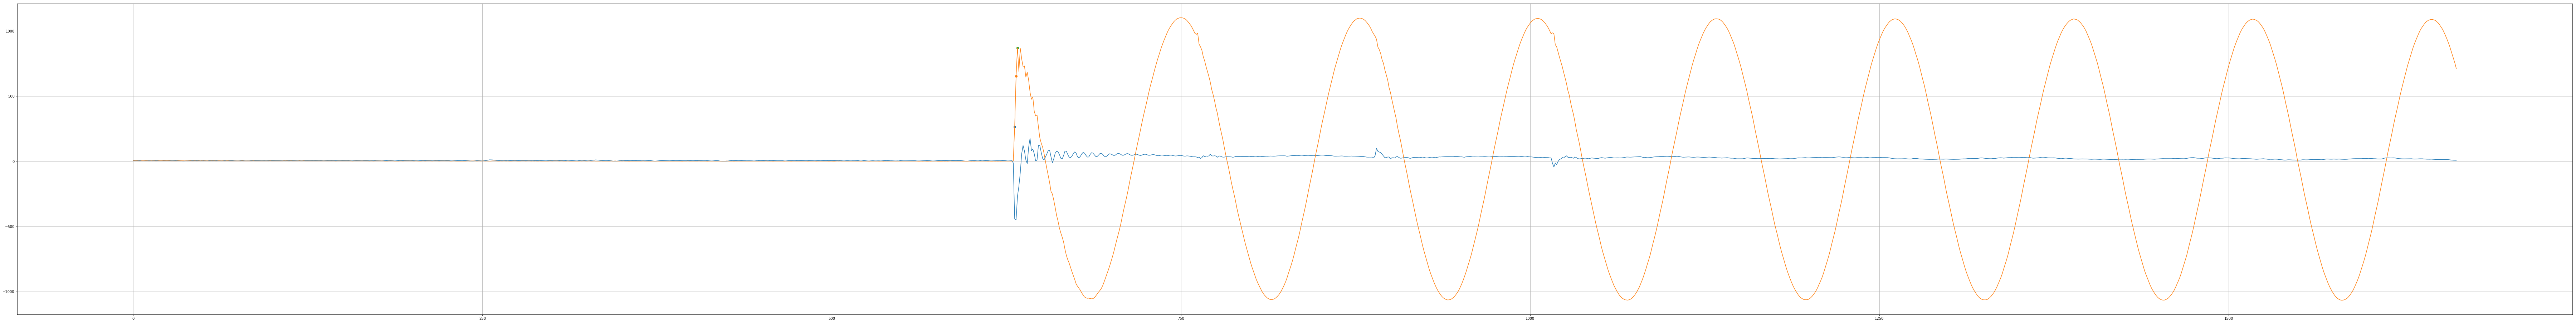

In [8]:
#Draw I0
plt.figure(figsize=(128, 16))
#plt.plot(data)
plt.plot(gfLocalSampI0)

#Draw U0
#plt.plot(u0)
plt.plot(gfLocalSampU0)
# 显示突变的U0坐标点
plt.scatter(index-1, u0[index-1])
plt.scatter(index, u0[index])
plt.scatter(index+1, u0[index+1])
plt.grid(True)

# Decice Dir
print(u0[index-1]*gfLocalSampI0[index-1])
print(u0[index]*gfLocalSampI0[index])
print(u0[index+1]*gfLocalSampI0[index+1])